# Transaction sizes and frequencies

## Setup

In [1]:
require(data.table)
require(ggplot2)
require(magrittr)
require(MASS)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: magrittr

Loading required package: MASS



## Transaction size distribution

### Read export from `cardano-db-sync`

```sql
\copy (select size from tx where size > 0 and block_id >= 5000000 and valid_contract) to tx-size-raw.csv header csv
```

In [2]:
txSize <- fread("tx-size-raw.csv")
colnames(txSize) <- c("Size")
txSize %>% summary

      Size      
 Min.   :   55  
 1st Qu.:  374  
 Median :  706  
 Mean   : 1940  
 3rd Qu.: 1761  
 Max.   :16384  

### Approximate by a log-normal distribution

In [3]:
meanLogTxSize <- txSize[, mean(log(`Size`))]
meanLogTxSize

[1] 6.832954

In [4]:
sdLogTxSize <- txSize[, sd(log(`Size`))]
sdLogTxSize

[1] 1.127498

### Plot the results

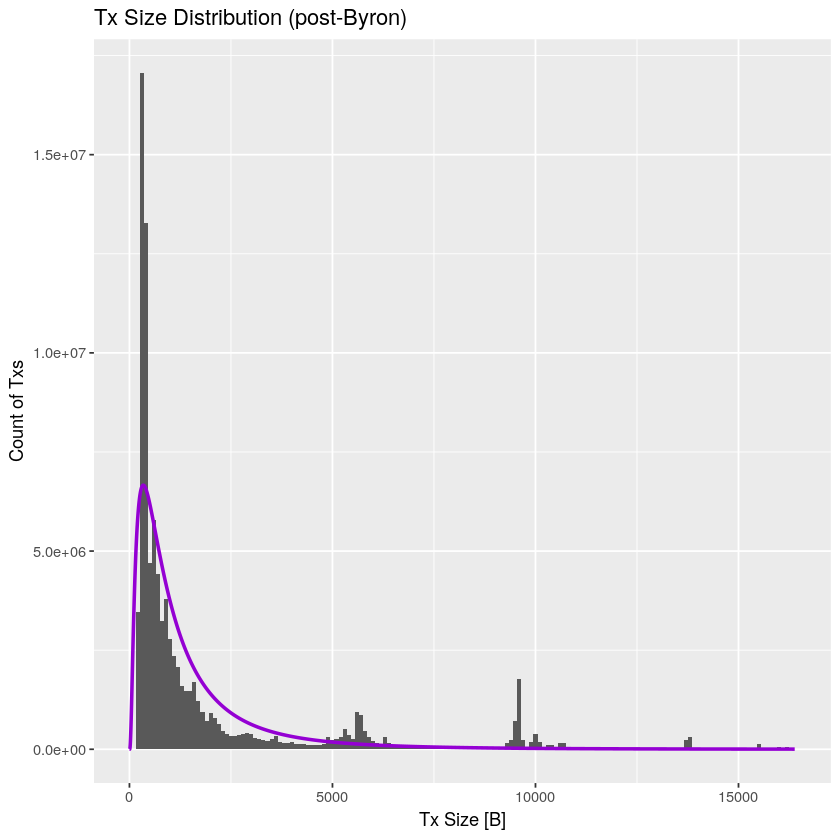

In [5]:
ggplot(txSize, aes(x = `Size`)) +
  geom_histogram(binwidth=100) +
  geom_line(
      data=data.table(Size=1:16384, Count=100*txSize[, .N] * dlnorm(1:16384, meanlog=meanLogTxSize), sdlog=sdLogTxSize),
      aes(x=`Size`, y=`Count`),
      color="darkviolet", linewidth=1
  ) +
  xlab("Tx Size [B]") +
  ylab("Count of Txs") +
  ggtitle("Tx Size Distribution (post-Byron)")

In [6]:
ggsave("tx-size.png", width=8, height=6, units="in", dpi=150)

In [7]:
ggsave("tx-size.svg", width=8, height=6, units="in", dpi=150)

## Distribution of transactions per block

### Read export from `cardano-db-sync`

```sql
\copy (select count(*) from tx where block_id >= 5000000 and valid_contract group by block_id) to tx-block-raw.csv header csv;
```

In [8]:
txFreq <- fread("tx-block-raw.csv")
colnames(txFreq) <- c("Txs/blk")
txFreq %>% summary

    Txs/blk      
 Min.   :  1.00  
 1st Qu.:  5.00  
 Median : 12.00  
 Mean   : 16.97  
 3rd Qu.: 24.00  
 Max.   :385.00  

### Approximate by an exponential distribution

In [9]:
meanTxFreq <- txFreq[, mean(`Txs/blk`)]
meanTxFreq

[1] 16.96903

### Plot the results

Warning message:
“Removed 2764 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 250 rows containing missing values (`geom_line()`).”


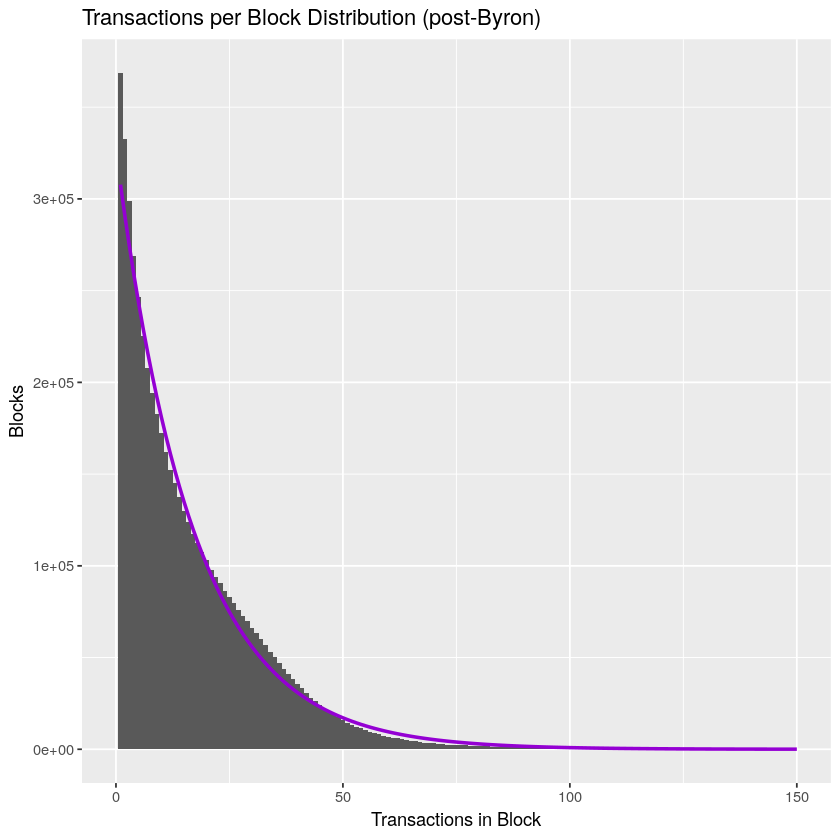

In [10]:
ggplot(txFreq, aes(x=`Txs/blk`)) +
  geom_histogram(binwidth=1) +
  geom_line(
      data=data.table(Size=1:400, Count=1*txFreq[, .N] * dexp(1:400, 1/meanTxFreq)),
      aes(x=`Size`, y=`Count`),
      color="darkviolet", linewidth=1
  ) +
  xlim(0, 150) +
  xlab("Transactions in Block") +
  ylab("Blocks") +
  ggtitle("Transactions per Block Distribution (post-Byron)")

In [11]:
ggsave("tx-freq.png", width=8, height=6, units="in", dpi=150)

Warning message:
“Removed 2764 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 250 rows containing missing values (`geom_line()`).”


In [12]:
ggsave("tx-freq.svg", width=8, height=6, units="in", dpi=150)

Warning message:
“Removed 2764 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 250 rows containing missing values (`geom_line()`).”
